# Validation Curves
Code largely sourced from [https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb) and [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)

In [1]:
from sklearn.model_selection import validation_curve

# Get/Create Some Data

In [2]:
from sklearn.model_selection import train_test_split
import ck_helpers.example_data as ckdata

(X, Y) = ckdata.AND(20, random_state=42)

(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, train_size=0.75, random_state=42)

## Construct An "Estimator"
This can be anything that implements "fit" and "predict" methods.
SEE: [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

In [3]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()

## Supply Data, A Range Of Parameters, And The "Estimator To validation_curve.
NOTE: There are many more parameters which can be found at [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)

In [4]:
depths = [1, 2, 3, 4]

curve = validation_curve(estimator=estimator,      # An Estimator
                         X = X_train,              # X
                         y = Y_train,               # Y
                         param_name = "max_depth", # The Parameter of our Estimator that we want to vary
                         param_range = depths,     # The range of Parameter values to use
                         n_jobs = -1)              # Number of processes to run in parallel. -1 means use all available processors.

In [5]:
# Decompose the curve object into it's constituent parts if you like
(train_scores_per_argument, test_scores_per_argument) = curve

## Plot The Learning Curve

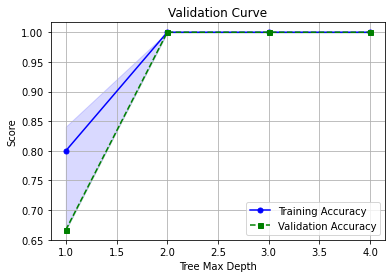

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Find Mean and Standard Deviation To Plot A Solid Line And Standard Deviation Window Respectively
train_scores_mean = np.mean(train_scores_per_argument, axis=1)
train_scores_std = np.std(train_scores_per_argument, axis=1)
test_scores_mean = np.mean(test_scores_per_argument, axis=1)
test_scores_std = np.std(test_scores_per_argument, axis=1)

# Plot The Training Data Validation Curve And Validation Data Validation Curves
plt.plot(depths, train_scores_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.plot(depths, test_scores_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.legend(["Training Accuracy", "Validation Accuracy"], loc="lower right")

# Plot The Training Data Standard Deviation Window
plt.fill_between(
    depths,
    train_scores_mean + train_scores_std,
    test_scores_mean - test_scores_std,
    alpha=0.15,
    color='blue'
)

# Plot The Validation Data Standard Deviation Windows
plt.fill_between(
    depths,
    test_scores_mean + test_scores_std,
    test_scores_mean - test_scores_std,
    alpha=0.15,
    color='green'
)

# Make The Plot Look Good, And Label Things :)
plt.grid()
plt.title("Validation Curve")
plt.xlabel("Tree Max Depth")
plt.ylabel("Score")
plt.show()